***Why Quantum Machine Learning?***

In the introduction of Quantum Machine Learning, it is essential to know what actually is Machine Learning. Let's have a deep dive into Machine Learning concepts including training models, increasing accuracies of the models.

In this tutorial, we discuss linear models,  and support vector machines. Comparing their accuracies, you're assigned to analysis how each of them perform well on what kind of datasets.

For every machine learning model to be built, there are some steps involved. In this tutorial, let's go through each step in the process of building your model on your own.

Look at the steps mentioned below:
1. Fetching the data
2. Exploratory Data Analysis
3. Preprocessing the data
4. Choosing the right model
5. Evaluating the model
6. Finding the accuracy of the model

These six steps are basic building blocks of Training and Testing a machine Learning model.





###Importing Libraries

In [3]:
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### Fetching the Data


Fetching the data can be performed using various available libraries in python like pandas, numpy
1. Pandas is a python library rich in it's support extending to file formats like comma seperated values (.csv), 

In [4]:
data=pd.read_csv("/content/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Let's take a look at the data.

In [5]:
print("Shape:",data.shape)
print("Info:\n",data.info)
data.isnull().sum()

Shape: (200, 6)
Info:
 <bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Seems like there are no null values, so no need to handling missing data in here.

### Exploratory Data Analysis

Let's see how the parameters are correlated and visualizing with a heat map.

<Axes: >

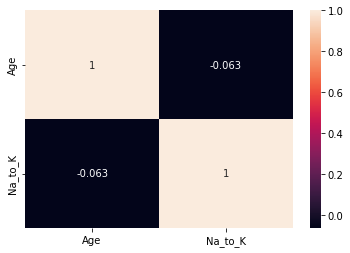

In [6]:
correlation=data.corr()
correlation
sns.heatmap(correlation,annot=True)

In [7]:
def age_grp(x):
    if x <= 20 :
        x= '18-20'
    elif x >20 and x <=30:
        x= '21-30'
    elif x >30 and x <=40:
        x= '31-40'
    elif x >40 and x <=50:
        x= '41-50'
    elif x >50 and x <=60:
        x= '51-60'
    elif x >60 and x <=70:
        x= '61-70'
    else:
        x= '71+'
    return x

In [8]:
data['age_group']=data['Age'].apply(age_grp)
data.groupby('age_group')['Sex'].value_counts()

age_group  Sex
18-20      F      10
           M       6
21-30      F      17
           M      15
31-40      F      22
           M      17
41-50      M      25
           F      15
51-60      M      17
           F      16
61-70      M      18
           F      12
71+        M       6
           F       4
Name: Sex, dtype: int64

M    104
F     96
Name: Sex, dtype: int64

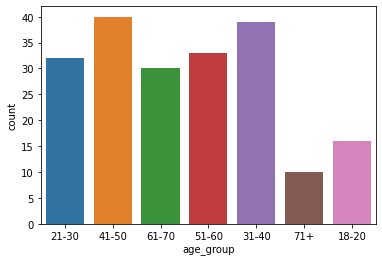

In [9]:
sns.countplot(x='age_group', data=data)
data['Sex'].value_counts()

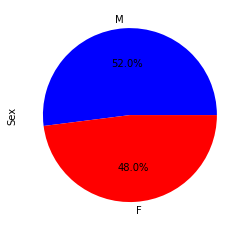

In [10]:
colors=['Blue','Red']
data.Sex.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

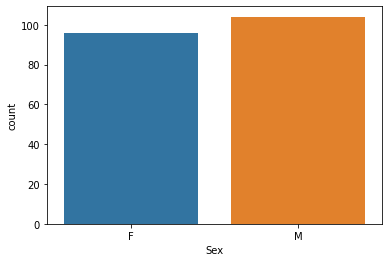

In [11]:
sns.countplot(x='Sex', data=data)

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


<Axes: xlabel='Drug', ylabel='count'>

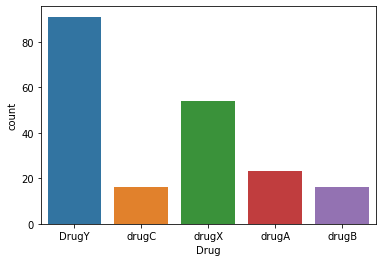

In [12]:
print(data['Drug'].value_counts())
sns.countplot(x='Drug', data=data)

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

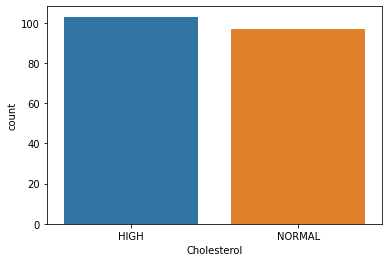

In [13]:
sns.countplot(x='Cholesterol', data=data)
data['Cholesterol'].value_counts()

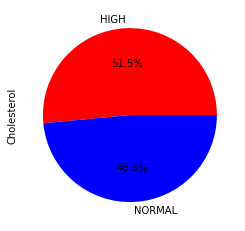

In [14]:
colors=['red','Blue']
data.Cholesterol.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

<Axes: xlabel='Drug', ylabel='count'>

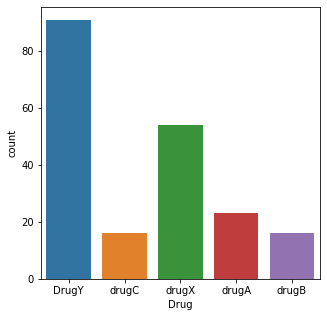

In [15]:
data['Drug'].value_counts()
plt.figure(figsize=(5,5))
sns.countplot(x='Drug', data=data)

### *Tasks:*
1. Try out other plots like histograms, scatter plots,colour maps, and so on. Write down what you've observed with each of your EDA plots and your understanding of the data.
2. Uncomment the below code and Analyse the data given write some analysis below that cell.

In [16]:
# eda = pandas_profiling.ProfileReport(data)
# eda

### Preprocessing

In [17]:
label_encoder=preprocessing.LabelEncoder()
data['Sex']= label_encoder.fit_transform (data['Sex'])
data['Cholesterol']= label_encoder.fit_transform (data['Cholesterol'])
data['Drug']= label_encoder.fit_transform (data['Drug'])

In [18]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Sex,200.0,0.520000,0.500854,0.000,0.0000,1.0000,1.00,1.000
Cholesterol,200.0,0.485000,0.501029,0.000,0.0000,0.0000,1.00,1.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200.0,1.595000,1.716305,0.000,0.0000,1.0000,4.00,4.000


In [19]:
data['BP'] = pd.Categorical(data['BP'])
dfDummiess = pd.get_dummies(data['BP'], prefix = 'BP')
dfDummiess

,BP_HIGH,BP_LOW,BP_NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,0,1
198,0,0,1


In [20]:
data = pd.concat([data,dfDummiess], axis=1)
data = data.drop(["BP"], axis = 1)

In [21]:
data

,Age,Sex,Cholesterol,Na_to_K,Drug,age_group,BP_HIGH,BP_LOW,BP_NORMAL
0,23,0,0,25.355,0,21-30,1,0,0
1,47,1,0,13.093,3,41-50,0,1,0
2,47,1,0,10.114,3,41-50,0,1,0
3,28,0,0,7.798,4,21-30,0,0,1
4,61,0,0,18.043,0,61-70,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,0,0,11.567,3,51-60,0,1,0
196,16,1,0,12.006,3,18-20,0,1,0
197,52,1,0,9.894,4,51-60,0,0,1
198,23,1,1,14.020,4,21-30,0,0,1


In [22]:
x=data.drop(['Drug'], axis=1)
y=data['Drug']

In [23]:
#Spilting dataset
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3 )
print(x_train.shape)
print(y_train.shape)


(140, 8)
(140,)


In [24]:
xtrain=x_train.drop("age_group",axis=1)
xtest=x_test.drop("age_group",axis=1)

## **Training and Evaluating Models**

So far, we understood the data, how parameters are affecting the target variable. You might have also observed that, there are multiple classes to be classified. It's a MULTI CLASS CLASSIFICATION. 

There are some classification models such as: 

- Logistic Regression

- Support Vector Machines

- K-NN

- Decision trees and Random Forests (ensemble learning)

- Naive Bayes (Gaussian, Mulitnomial, etc)

If you're more hooked up into these basic techniques (mainly in supervised learning), go check out the [Sci-kit Learn website](https://scikit-learn.org/stable/supervised_learning.html) on this topic! 

First idea:

Use K−1 classifiers, each solving a two class problem of separating point in a class Ck from points not in the class. This is also known as [1 vs all or 1 vs the rest classifier](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)

Now the problem is that there's more than one good answer for the green region!

Go to [this site](https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/07_multiclass.pdf) right away to understand what multi-class classification is.


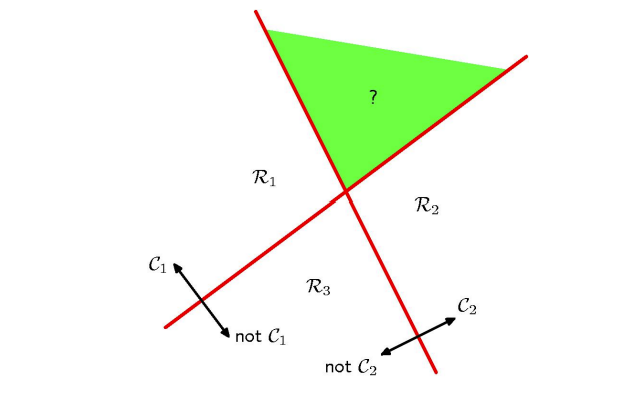

### Linear Models

***Logistic Regression***

In [25]:
model = LogisticRegression(multi_class='multinomial', C=1.0,solver='lbfgs', max_iter=3000)
model.fit(xtrain, y_train)

LogisticRegression(max_iter=3000, multi_class='multinomial')

In [26]:
y_pred=model.predict(xtest)

[[30  0  0  0  0]
 [ 0  5  1  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 13]]


<Axes: >

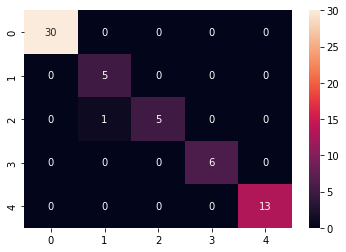

In [27]:
cm=confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [28]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9833333333333333


**Tasks**
1. So far, we have seen the accuracy with logistic Regression, try for KNN, Decision tree, naive bayes models.Compare their accuracies and write down your analysis.
2. Change hyperparamters and achieve good accuracies for all the models. 


### Support Vector Machines

Read about Support Vector Machines 
https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

and look https://scikit-learn.org/stable/modules/svm.html#classification for better unerstanding.

In [29]:
from sklearn.svm import LinearSVC
SVMmodel = LinearSVC()
SVMmodel.fit(xtrain, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [30]:
ypred=SVMmodel.predict(xtest)

[[26  0  0  0  0]
 [ 0  5  3  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  6  0]
 [ 2  0  0  0 13]]


<Axes: >

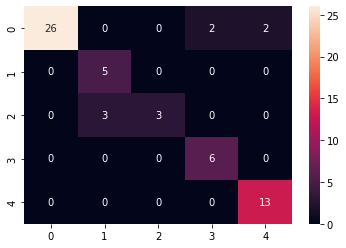

In [31]:
cm=confusion_matrix(ypred, y_test)
print(cm)
sns.heatmap(confusion_matrix(y_test, ypred), annot=True)

In [32]:
accuracy=accuracy_score(y_test, ypred)
print(accuracy)

0.8833333333333333


Try changing the settings of the kernel i.e, you can try changing hyperparamters and improve the accuracy.

### Ensembling models

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. Look [here](https://scikit-learn.org/stable/modules/ensemble.html)


In [33]:
rfc = RandomForestClassifier(max_depth=4)

In [34]:
rfc.fit(xtrain, y_train)

RandomForestClassifier(max_depth=4)

In [35]:
rand_forest_predictions = rfc.predict(xtest)

In [48]:
decision_path = rfc.decision_path(xtrain)
accuracy= accuracy_score(y_test, rand_forest_predictions)
print("The accuracy is:",accuracy)
# rand_forest_predictions

The accuracy is: 0.9833333333333333


**Tasks:**

1. Try to improve accuracy of the model by changing hyperparameters.
2. Try with other models like XGBoost, AdaBoost, CatBoost,and so on and compare accuracies.



### Optional Tasks

***Try Out!!!***

We have seen various models and their accuracies on the dataset. Now, let's look into enterprise approach by automating the tasks that you've done till now. Try out GRID SEARCH which is what we're talking about.

Read more [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Uncomment the following code and implement the grid search. 

In [ ]:
# def choose_best_gcvFit_for_a_model(model, X, y, param_grid, cv=5, scoring='accuracy'):
#     gcv_obj = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
#     gcv_obj.fit(X, y)
#     best_score = gcv_obj.best_score_
#     best_params = gcv_obj.best_params_
#     return {"Best score" : best_score, "Best parameters" : best_params}

In [ ]:
# def compare_models_with_best_gcvFits(models, X, y, param_grids, cv=5, scoring='accuracy'):
#     score_grid = {}

#     for i in models:
#         ml_model =  models[i]
#         paramGrid = param_grids[i]
#         gcv = GridSearchCV(ml_model, paramGrid, cv=cv, scoring=scoring)
#         gcv.fit(X, y)
#         score_grid.update({i: {"hyperParameters": gcv.best_params_, "score": gcv.best_score_}})
        
#     for i in score_grid:
#         print(i)
#         print('\t', score_grid[i]['hyperParameters'])

In [ ]:
# model = SVC()
# param_grid = {
#         "kernel": ['linear', 'poly', 'rbf'],
#         "max_iter": [0, 100, 1000],
#         "degree": [2, 3, 4]
# }
# ourGridCVObj = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

Use the methods above and try out until you're bored! :)


As you have seen, for every model we're importing the model algorithm. Try to understand how each model works and implement them without importing. We'll discuss about this neural network classification and regression in the upcoming tutorial notebook.


*This notebook was prepared by the Core Team of QML, QuantumAI- Gayatri Vadaparty, Srinadh Vura, Sai Ganesh Manda, Nouhaila Innan* 